In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split,KFold

In [78]:
df=pd.read_csv('airbnb_final.csv')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   available               1749 non-null   int64  
 1   price                   1749 non-null   float64
 2   minimum_nights          1749 non-null   int64  
 3   maximum_nights          1749 non-null   int64  
 4   latitude                1749 non-null   float64
 5   longitude               1749 non-null   float64
 6   accomodates             1749 non-null   int64  
 7   bedrooms                1621 non-null   float64
 8   beds                    1708 non-null   float64
 9   comments                1749 non-null   float64
 10  host_exp                1749 non-null   int64  
 11  shared_bath             1749 non-null   int64  
 12  baths                   1749 non-null   float64
 13  room_type_Hotel room    1749 non-null   int64  
 14  room_type_Private room  1749 non-null   

In [83]:
df.rename(columns = {'room_type_Hotel room':'Hotel_room', 'room_type_Private room':'Private_room','room_type_Shared room':'Shared_room'}, inplace = True)

In [80]:
columns=['available', 'price', 'minimum_nights', 'maximum_nights', 'latitude',
       'longitude', 'accomodates', 'bedrooms', 'beds', 'comments', 'host_exp',
       'shared_bath', 'baths', 'Hotel_room',
       'Private_room', 'Shared_room']

In [84]:
int_col=['available', 'minimum_nights', 'maximum_nights', 'accomodates', 'bedrooms', 'beds', 'comments', 'host_exp',
       'shared_bath', 'Hotel_room',
       'Private_room', 'Shared_room']

In [85]:
float_col=['latitude','longitude','baths','price']

In [86]:
df_train, df_test= train_test_split(df, test_size=0.2,random_state=42)

In [87]:
df_train.shape,df_test.shape

((1399, 16), (350, 16))

<AxesSubplot:>

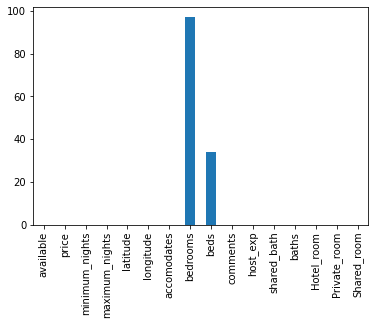

In [88]:
df_train.isna().sum().plot(kind='bar')

<AxesSubplot:>

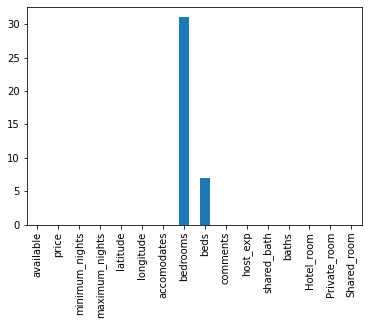

In [89]:
df_test.isna().sum().plot(kind='bar')

#### Filling missing values

In [90]:
imputer = KNNImputer(n_neighbors=3)
X=imputer.fit_transform(df_train)
df_train=pd.DataFrame(X,columns=df_train.columns)

In [91]:
imputer = KNNImputer(n_neighbors=3)
X=imputer.fit_transform(df_test)
df_test=pd.DataFrame(X,columns=df_test.columns)

In [92]:
df=pd.concat([df_train,df_test])

In [93]:
df.shape

(1749, 16)

In [94]:
for attr in int_col:
    df[attr]=df[attr].astype('int')
for attr in float_col:
    df[attr]=df[attr].astype('float')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749 entries, 0 to 349
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   available       1749 non-null   int32  
 1   price           1749 non-null   float64
 2   minimum_nights  1749 non-null   int32  
 3   maximum_nights  1749 non-null   int32  
 4   latitude        1749 non-null   float64
 5   longitude       1749 non-null   float64
 6   accomodates     1749 non-null   int32  
 7   bedrooms        1749 non-null   int32  
 8   beds            1749 non-null   int32  
 9   comments        1749 non-null   int32  
 10  host_exp        1749 non-null   int32  
 11  shared_bath     1749 non-null   int32  
 12  baths           1749 non-null   float64
 13  Hotel_room      1749 non-null   int32  
 14  Private_room    1749 non-null   int32  
 15  Shared_room     1749 non-null   int32  
dtypes: float64(4), int32(12)
memory usage: 150.3 KB


### EDA

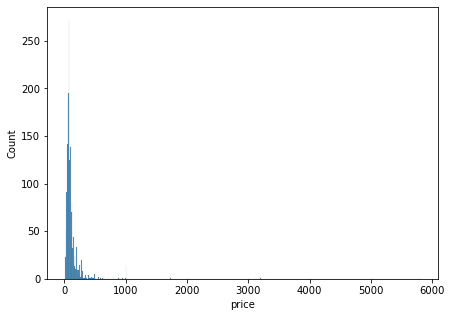

In [21]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.histplot(x=df.price)
plt.show()

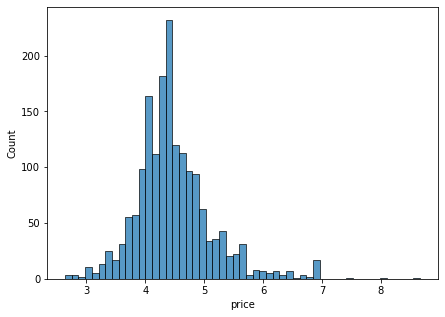

In [23]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.histplot(x=np.log(df.price))
plt.show()

In [100]:
df_train['log_price']=np.log(df_train.price)
df_test['log_price']=np.log(df_test.price)
df['log_price']=np.log(df.price)

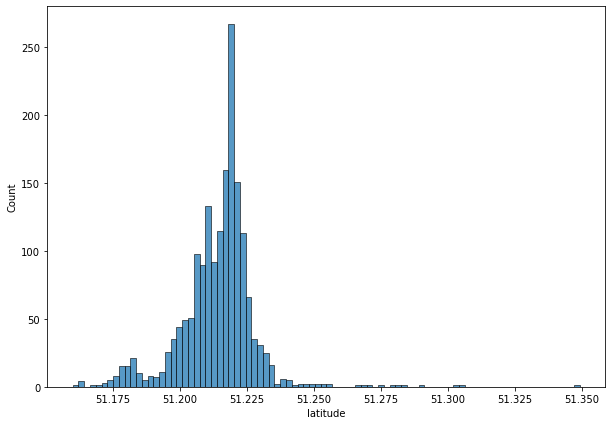

In [25]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(x=df.latitude)
plt.show()

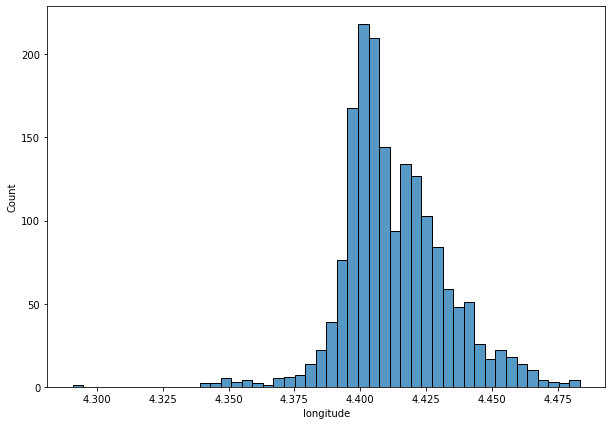

In [26]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(x=df.longitude)
plt.show()

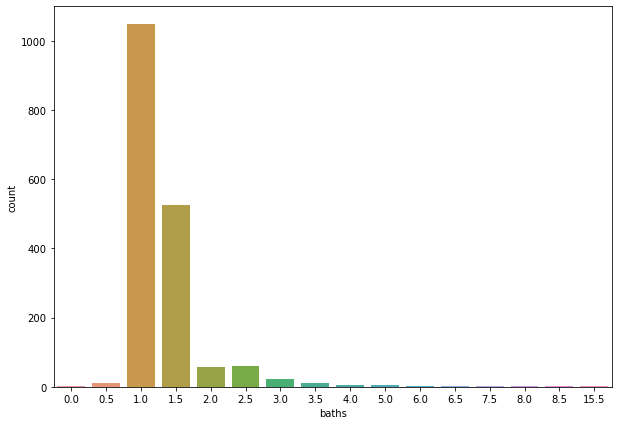

In [27]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(x=df.baths)
plt.show()

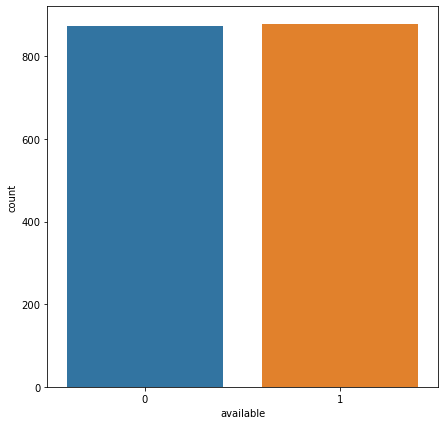

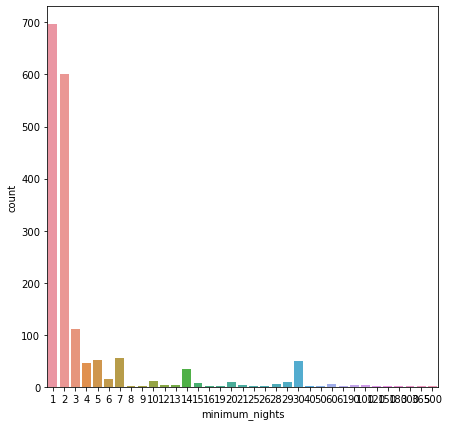

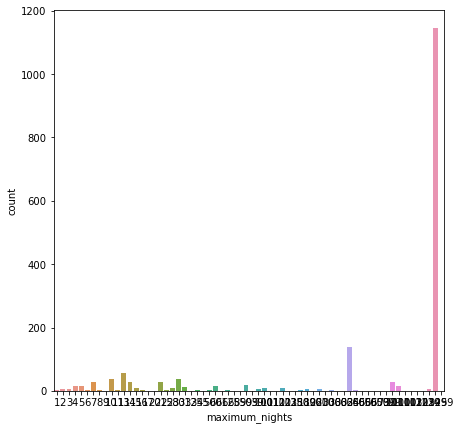

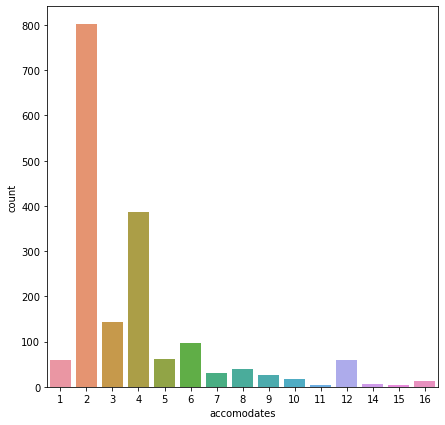

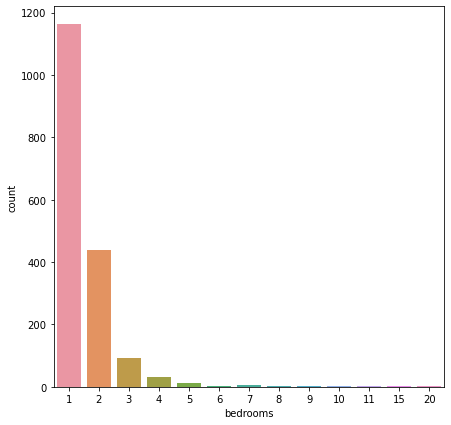

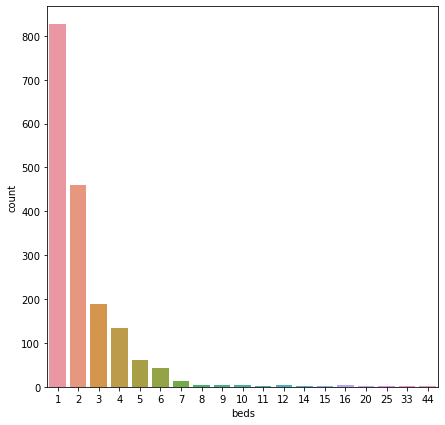

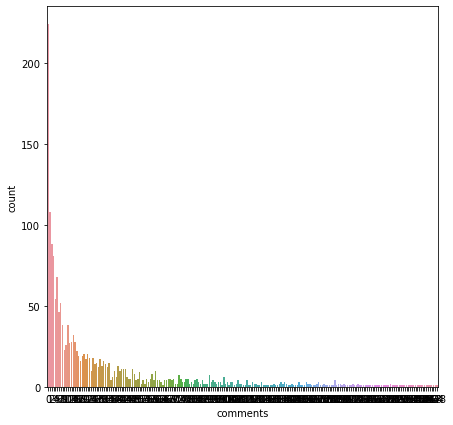

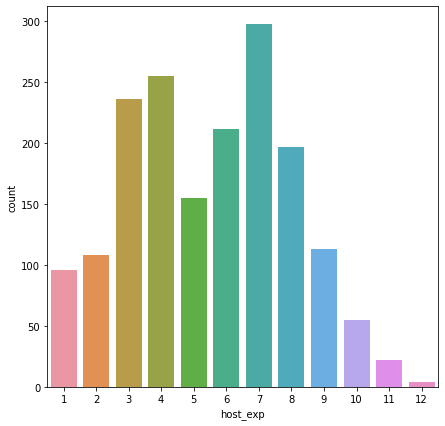

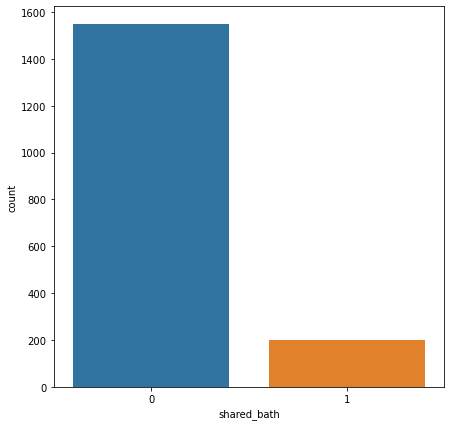

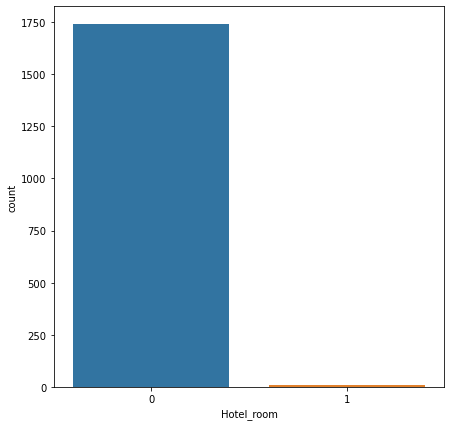

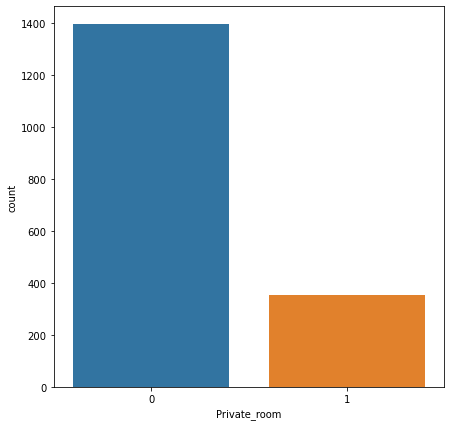

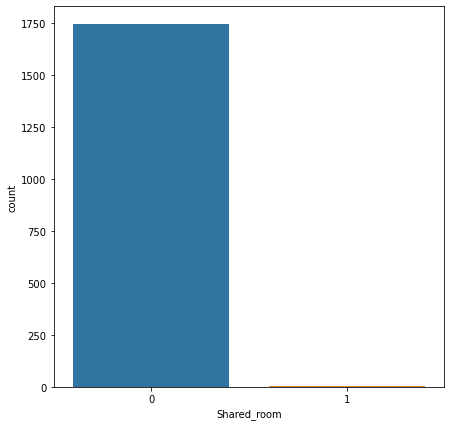

In [96]:
for attr in int_col:
    fig, ax = plt.subplots(figsize=(7, 7))
    sns.countplot(x=df[attr])
    plt.show()

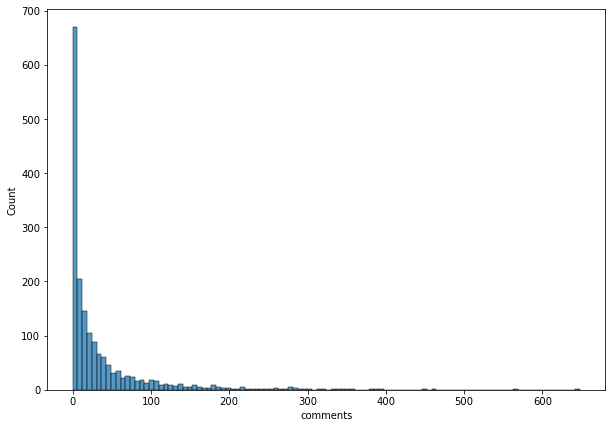

In [33]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(x=df.comments)
plt.show()

In [34]:
df.price.describe().T

count    1749.000000
mean      118.440823
std       201.874365
min        14.000000
25%        60.000000
50%        79.000000
75%       120.000000
max      5800.000000
Name: price, dtype: float64

In [35]:
np.log(df.price).describe()

count    1749.000000
mean        4.471464
std         0.652024
min         2.639057
25%         4.094345
50%         4.369448
75%         4.787492
max         8.665613
Name: price, dtype: float64

In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
available,1749.0,0.501429,0.500141,0.000000,0.000000,1.000000,1.000000,1.000000
price,1749.0,118.440823,201.874365,14.000000,60.000000,79.000000,120.000000,5800.000000
minimum_nights,1749.0,5.392224,21.459729,1.000000,1.000000,2.000000,3.000000,500.000000
maximum_nights,1749.0,813.343625,518.645234,1.000000,365.000000,1125.000000,1125.000000,9999.000000
latitude,1749.0,51.214069,0.013740,51.160084,51.207870,51.216540,51.220880,51.349400
longitude,1749.0,4.413165,0.019373,4.290770,4.400240,4.409460,4.424660,4.483470
accomodates,1749.0,3.761578,2.771378,1.000000,2.000000,3.000000,4.000000,16.000000
bedrooms,1749.0,1.500286,1.063017,1.000000,1.000000,1.000000,2.000000,20.000000
beds,1749.0,2.203545,2.209499,1.000000,1.000000,2.000000,3.000000,44.000000
comments,1749.0,35.976558,61.998958,0.000000,3.000000,13.000000,40.000000,648.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='log_price'>

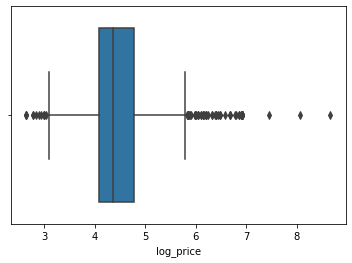

In [102]:
sns.boxplot(df.log_price)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitude'>

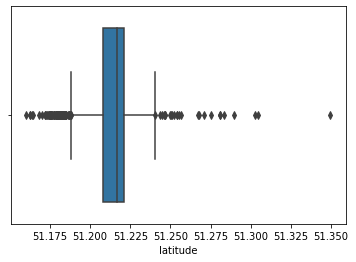

In [39]:
sns.boxplot(df.latitude)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude'>

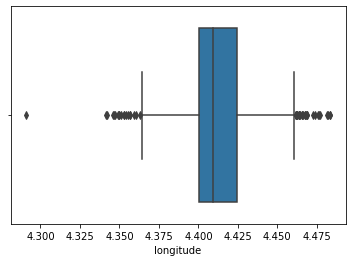

In [40]:
sns.boxplot(df.longitude)

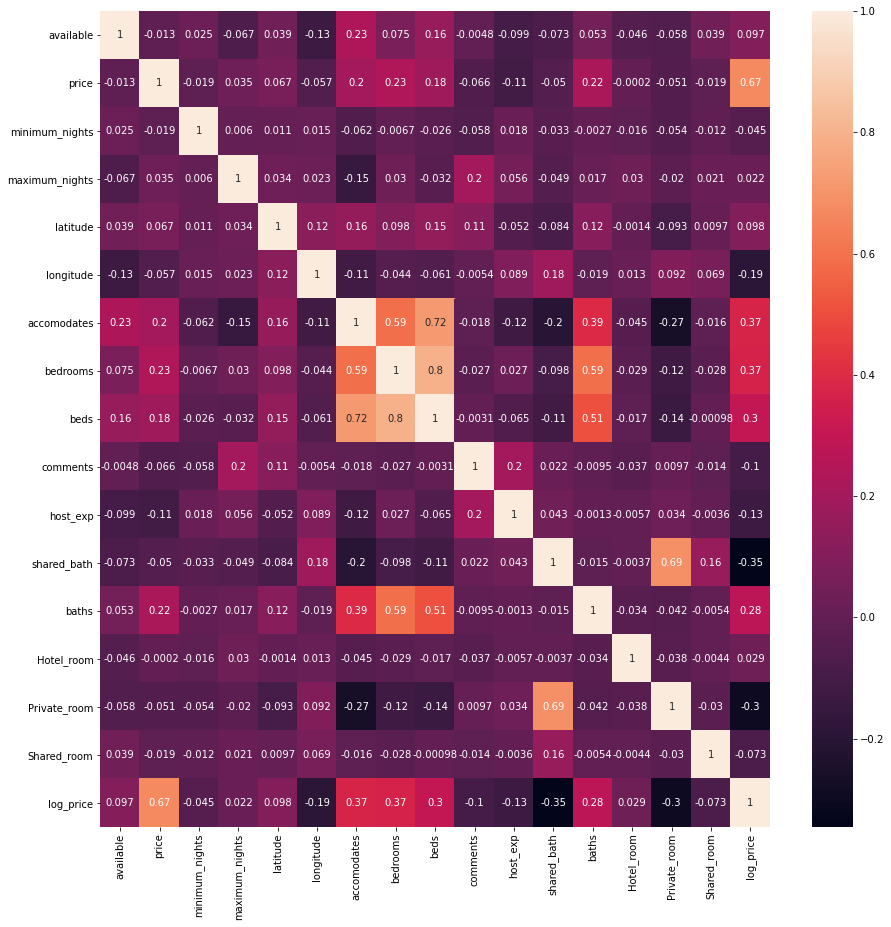

In [103]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(),annot=True)
plt.show()

##### Accomodates, beds and bedrooms are correlated

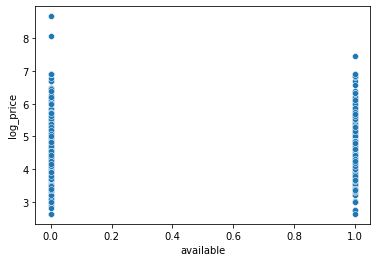

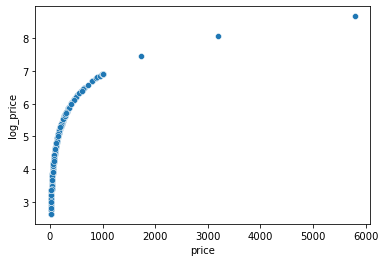

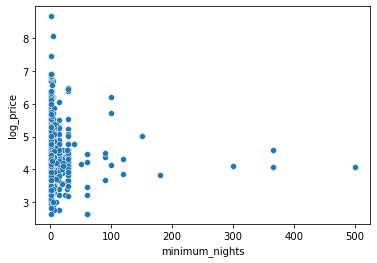

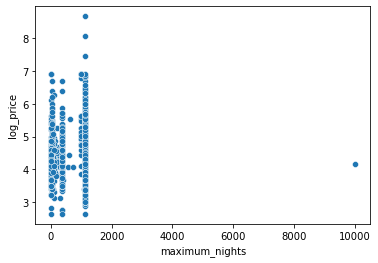

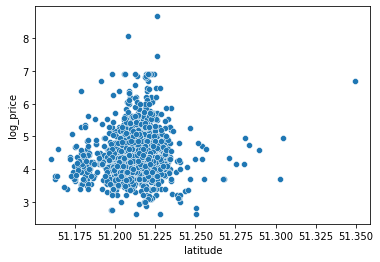

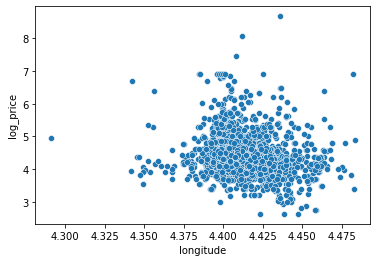

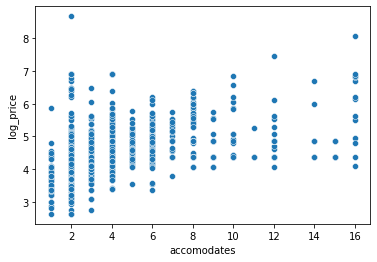

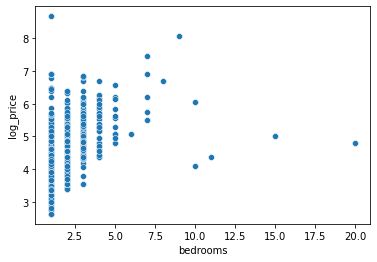

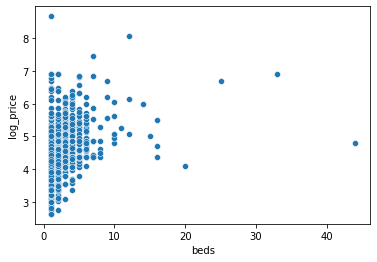

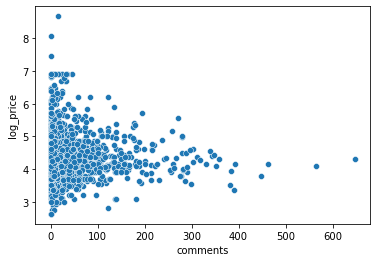

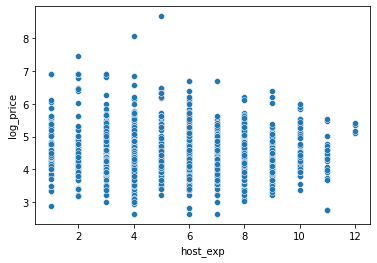

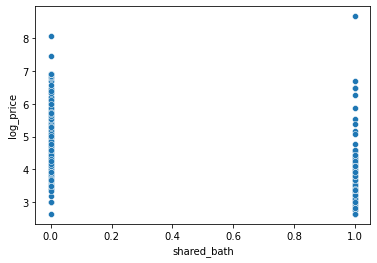

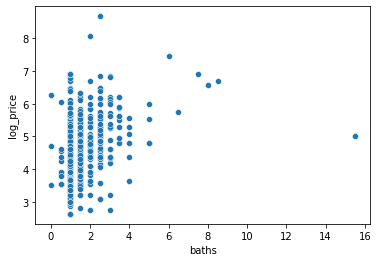

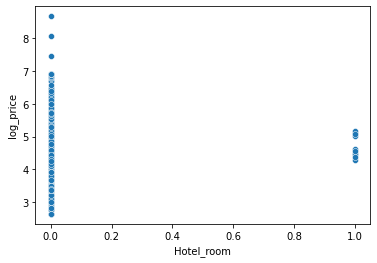

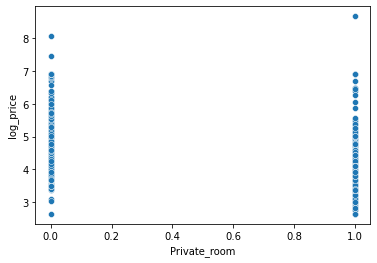

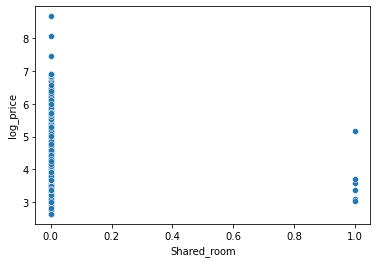

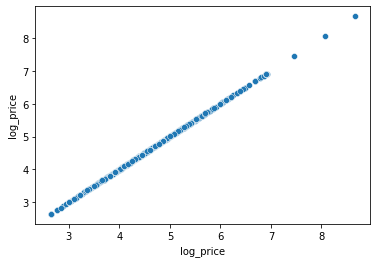

In [104]:
for attr in df:
    sns.scatterplot(y=df.log_price,x=df[attr])
    plt.show()

In [105]:
X_train=df_train.drop(axis=1,columns=['price','log_price'])
X_test=df_test.drop(axis=1,columns=['price','log_price'])
y_train=df_train.log_price
y_test=df_test.log_price

### Linear Regression

In [106]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train)
results = model.fit()

In [107]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              log_price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              6375.
Date:                Mon, 09 May 2022   Prob (F-statistic):                        0.00
Time:                        00:44:36   Log-Likelihood:                         -1124.5
No. Observations:                1399   AIC:                                      2279.
Df Residuals:                    1384   BIC:                                      2358.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [108]:
from sklearn import metrics
#test rmse
y_pred = results.predict(X_test)
metrics.mean_squared_error(np.exp(y_pred),np.exp(y_test),squared=False)

145.91722677508557

In [109]:
# train rmse
y_pred = results.predict(X_train)
metrics.mean_squared_error(np.exp(y_pred),np.exp(y_train),squared=False)

210.54816779435998

### Regression Trees

In [134]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [135]:
#test rmse
y_pred = regressor.predict(X_test)
metrics.mean_squared_error(np.exp(y_pred),np.exp(y_test),squared=False)

123.55801413563934

In [136]:
#train rmse
y_pred = regressor.predict(X_train)
metrics.mean_squared_error(np.exp(y_train),np.exp(y_pred),squared=False)

0.0

In [159]:
pd.DataFrame(data=regressor.feature_importances_,index=X_train.columns,columns=['feature_importance']).sort_values(ascending=False,by='feature_importance').head(5)

,feature_importance
longitude,0.193502
accomodates,0.151202
bedrooms,0.105758
latitude,0.095889
comments,0.076904


### Random Forest Regressor

In [137]:
from sklearn.ensemble import RandomForestRegressor

In [139]:
rf=RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [140]:
#test rmse
y_pred = rf.predict(X_test)
metrics.mean_squared_error(np.exp(y_pred),np.exp(y_test),squared=False)

95.13336145220757

In [141]:
#train rmse
y_pred = rf.predict(X_train)
metrics.mean_squared_error(np.exp(y_train),np.exp(y_pred),squared=False)

142.1232509346228

### The top five important features are:

In [156]:
pd.DataFrame(data=rf.feature_importances_,index=X_train.columns,columns=['feature_importance']).sort_values(ascending=False,by='feature_importance').head(5)

,feature_importance
longitude,0.148344
bedrooms,0.139780
latitude,0.124887
accomodates,0.103568
shared_bath,0.076376


### GBM

In [143]:
from sklearn.ensemble import GradientBoostingRegressor
gbm= GradientBoostingRegressor(random_state=42)

In [144]:
gbm.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [145]:
#test rmse
y_pred = gbm.predict(X_test)
metrics.mean_squared_error(np.exp(y_pred),np.exp(y_test),squared=False)

113.97320101920434

In [146]:
#train rmse
y_pred = gbm.predict(X_train)
metrics.mean_squared_error(np.exp(y_train),np.exp(y_pred),squared=False)

171.25059940746644

In [158]:
pd.DataFrame(data=gbm.feature_importances_,index=X_train.columns,columns=['feature_importance']).sort_values(ascending=False,by='feature_importance').head(5)

,feature_importance
bedrooms,0.202717
accomodates,0.157261
longitude,0.128353
shared_bath,0.088551
latitude,0.077763
